In [1]:
import numpy as np
import cv2
import glob
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import models,layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [2]:
features=[]
all_labels=[]
for i,address in enumerate(glob.glob(r'C:\Users\VAIO\Desktop\DSC\PYTHON1\covid\Covid19-dataset and code1\train\*\*')):
    img=cv2.imread(address)
    img=cv2.resize(img,(32,32))
    img=img/255.0  
    img=img.flatten()
    features.append(img)
    label=address.split('\\')[-2]
    all_labels.append(label)
    
    if(i%10==0):
       print('[INFO] {}/60 is processed'.format(i))


features=np.array(features)
le=LabelEncoder()
all_labels=le.fit_transform(all_labels)
all_labels=to_categorical(all_labels)
x_train=features
y_train=all_labels



features=[]
all_labels=[]
for i,address in enumerate(glob.glob(r'C:\Users\VAIO\Desktop\DSC\PYTHON1\covid\Covid19-dataset and code1\test\*\*')):
    img=cv2.imread(address)
    img=cv2.resize(img,(32,32))
    img=img/255.0  
    img=img.flatten()
    features.append(img)
    label=address.split('\\')[-2]
    all_labels.append(label)
    
    if(i%10==0):
       print('[INFO] {}/60 is processed'.format(i))


features=np.array(features)
le=LabelEncoder()
all_labels=le.fit_transform(all_labels)
all_labels=to_categorical(all_labels)
x_test=features
y_test=all_labels

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)







[INFO] 0/60 is processed
[INFO] 10/60 is processed
[INFO] 20/60 is processed
[INFO] 30/60 is processed
[INFO] 40/60 is processed
[INFO] 50/60 is processed
[INFO] 60/60 is processed
[INFO] 0/60 is processed
[INFO] 10/60 is processed
[INFO] 20/60 is processed
[INFO] 30/60 is processed
[INFO] 40/60 is processed
(68, 3072)
(68, 2)
(46, 3072)
(46, 2)


In [98]:
x_train.shape

(54, 3072)

In [3]:
net=models.Sequential([
                       layers.Dense(1500,activation="relu",input_dim=3072),
                       layers.Dense(750,activation="relu",input_dim=1500),
                       layers.Dense(325,activation="relu",input_dim=750),
                       layers.Dense(150,activation="relu",input_dim=325),
                       layers.Dense(75,activation="relu",input_dim=150),
                       layers.Dense(2,activation="softmax",input_dim=75),


                      ])
print(net.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              4609500   
                                                                 
 dense_1 (Dense)             (None, 750)               1125750   
                                                                 
 dense_2 (Dense)             (None, 325)               244075    
                                                                 
 dense_3 (Dense)             (None, 150)               48900     
                                                                 
 dense_4 (Dense)             (None, 75)                11325     
                                                                 
 dense_5 (Dense)             (None, 2)                 152       
                                                                 
Total params: 6,039,702
Trainable params: 6,039,702
Non-

In [4]:
net.compile(optimizer='adam',
            metrics=["accuracy"],
            loss="categorical_crossentropy"
            )

In [5]:
out=net.fit(x_train,y_train,batch_size=16,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
5/5 [==============================] - 13s 954ms/step - loss: 1.6082 - accuracy: 0.4706 - val_loss: 1.2274 - val_accuracy: 0.4348
Epoch 2/25
5/5 [==============================] - 2s 332ms/step - loss: 1.1574 - accuracy: 0.4118 - val_loss: 0.8122 - val_accuracy: 0.4348
Epoch 3/25
5/5 [==============================] - 1s 250ms/step - loss: 0.6027 - accuracy: 0.6471 - val_loss: 0.5724 - val_accuracy: 0.5652
Epoch 4/25
5/5 [==============================] - 1s 246ms/step - loss: 0.5422 - accuracy: 0.6618 - val_loss: 0.4877 - val_accuracy: 0.6304
Epoch 5/25
5/5 [==============================] - 1s 232ms/step - loss: 0.5657 - accuracy: 0.6029 - val_loss: 0.8796 - val_accuracy: 0.5000
Epoch 6/25
5/5 [==============================] - 1s 243ms/step - loss: 0.5090 - accuracy: 0.7500 - val_loss: 0.5381 - val_accuracy: 0.8043
Epoch 7/25
5/5 [==============================] - 1s 232ms/step - loss: 0.2913 - accuracy: 0.8824 - val_loss: 0.2348 - val_accuracy: 0.8696
Epoch 8/25
5/5 [===

In [107]:
net.save('Covid MLP.h5')

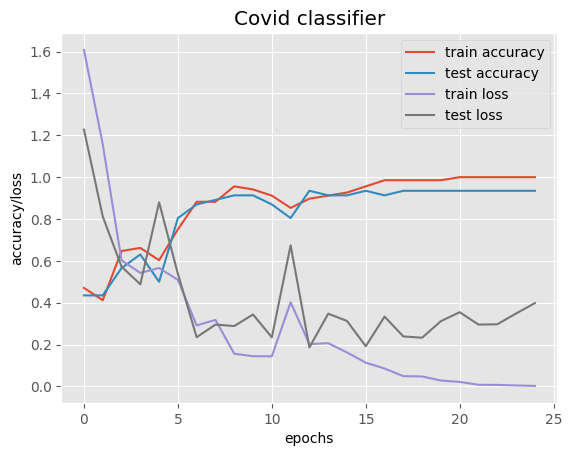

In [6]:
plt.plot(out.history["accuracy"],label="train accuracy")
plt.plot(out.history["val_accuracy"],label="test accuracy")
plt.plot(out.history["loss"],label="train loss")
plt.plot(out.history["val_loss"],label="test loss")
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("Covid classifier")
plt.legend()
#plt.savefig('cifar classifier-with Batch norm.jpg', dpi=300)
plt.show('center')